In [1]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
from keras.src.layers.normalization.batch_normalization import BatchNormalization
from keras.preprocessing import image
import numpy as np

(X_train, y_train), (X_test, y_test) = mnist.load_data()

Text(0.5, 1.0, 'Classe 5')

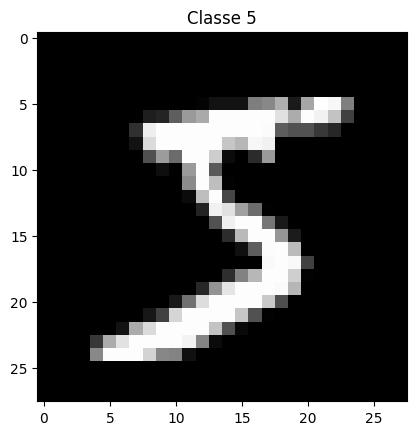

In [2]:
plt.imshow(X_train[0], cmap = 'gray')
plt.title('Classe ' + str(y_train[0]))

In [3]:
prev_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
prev_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
prev_train = prev_train.astype('float32')
prev_test = prev_test.astype('float32')

In [36]:
prev_train /= 255
prev_test /= 255

clas_train = to_categorical(y_train, 10)
clas_test = to_categorical(y_test, 10)

In [46]:
clas = Sequential()
clas.add(Conv2D(32, (3,3), input_shape = (28, 28, 1), activation = 'relu'))
clas.add(BatchNormalization())
clas.add(MaxPooling2D(pool_size =(2, 2), padding = 'same'))
clas.add(Conv2D(32, (3,3), activation = 'relu'))
clas.add(BatchNormalization())
clas.add(MaxPooling2D(pool_size =(2, 2), padding = 'same'))
clas.add(Flatten())



In [47]:

clas.add(Dense(units = 128, activation = 'relu'))
clas.add(Dropout(0.2))
clas.add(Dense(units=128,activation = 'relu'))
clas.add(Dropout(0.2))
clas.add(Dense(units = 10, activation = 'softmax'))
clas.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [48]:
clas.fit(prev_train, clas_train, batch_size = 128, epochs = 5, validation_data=(prev_test, clas_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 62ms/step - accuracy: 0.8320 - loss: 0.5295 - val_accuracy: 0.7121 - val_loss: 1.1967
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 56ms/step - accuracy: 0.9773 - loss: 0.0739 - val_accuracy: 0.5161 - val_loss: 3.0325
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.9848 - loss: 0.0481 - val_accuracy: 0.9589 - val_loss: 0.1268
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.9880 - loss: 0.0372 - val_accuracy: 0.9659 - val_loss: 0.1142
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.9897 - loss: 0.0314 - val_accuracy: 0.9622 - val_loss: 0.1386


In [69]:
resul = clas.evaluate(prev_test, clas_test)
resul

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9559 - loss: 0.1679


[0.13860248029232025, 0.9621999859809875]

In [77]:
imagem = image.load_img('numero.jpeg').convert('L')
imagem = imagem.resize((28,28))



In [78]:
imagem = image.img_to_array(imagem)
imagem /= 255
imagem =np.expand_dims(imagem, axis=0)

In [79]:
prev = clas.predict(imagem)
resul = np.argmax(prev)
resul

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


8